In [ ]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split

def load_images(directory):
    images = []
    for filename in os.listdir(directory):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            img = Image.open(os.path.join(directory, filename))
            images.append(np.array(img))
    return images
images = load_images("ASL_Dataset/Train/A")
print(images)

In [ ]:
img = images[0]

In [ ]:
preprocessed_images = []
for imgs in images:
    # Example: Resize the image to 224x224 pixels
    imgs = imgs.resize((224, 224))
    # Example: Normalize pixel values to be in the range [0, 1]
    imgs = imgs / 255.0
    preprocessed_images.append(img)
print(preprocessed_images)


In [ ]:
# Step 2: Preprocess the images
def preprocess_images(images):
    # Add any preprocessing steps here (e.g., resizing, normalization)
    preprocessed_images = []
    for img in images:
        # Convert the image array to a PIL Image object
        img_pil = Image.fromarray(img)
        # Resize the image to 224x224 pixels
        img_resized = img_pil.resize((224, 224))
        # Convert the resized image back to a NumPy array
        img_resized_np = np.array(img_resized)
        # Example: Normalize pixel values to be in the range [0, 1]
        img_normalized = img_resized_np / 255.0
        preprocessed_images.append(img_normalized)
    return preprocessed_images
pp_imgs = preprocess_images(images)
print(pp_imgs)

In [ ]:
pp_imgs[0][0]

In [ ]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Step 1: Load the images and their corresponding class labels
def load_images(directory):
    images = []
    labels = []
    class_names = os.listdir(directory)
    for class_name in class_names:
        class_dir = os.path.join(directory, class_name)
        print(class_dir)
        if os.path.isdir(class_dir):
            for filename in os.listdir(class_dir):
                if filename.endswith(".jpg") or filename.endswith(".png"):
                    img = Image.open(os.path.join(class_dir, filename))
                    images.append(np.array(img))
                    labels.append(class_name)
    return images, labels

# Step 2: Preprocess the images
def preprocess_images(images):
    # Resize images to a uniform size (e.g., 224x224)
    preprocessed_images = [np.array(Image.fromarray(img).resize((224, 224))) for img in images]
    # Perform any additional preprocessing steps here
    return preprocessed_images

# Step 3: Encode the class labels
def encode_labels(labels):
    unique_labels = np.unique(labels)
    label_map = {label: idx for idx, label in enumerate(unique_labels)}
    encoded_labels = [label_map[label] for label in labels]
    return np.array(encoded_labels)

# Step 4: Split the dataset
def split_dataset(images, labels, test_size=0.2, random_state=42):
    X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=test_size, random_state=random_state)
    return X_train, X_val, y_train, y_val

# Step 5: Create data generators
def create_data_generators(X_train, X_val, y_train, y_val, batch_size=32):
    train_datagen = ImageDataGenerator(rescale=1./255)
    val_datagen = ImageDataGenerator(rescale=1./255)
    
    train_generator = train_datagen.flow(np.array(X_train), y_train, batch_size=batch_size)
    val_generator = val_datagen.flow(np.array(X_val), y_val, batch_size=batch_size)
    
    return train_generator, val_generator

# Step 1: Load images and labels


# Now, train_generator and val_generator can be used to load batches of images and labels during training.


In [ ]:
images, labels = load_images("ASL_Dataset/Train")


In [ ]:
import numpy as np
import mediapipe as mp
import matplotlib.pyplot as plt
from PIL import Image
import cv2
# Your list of pixel values (2352 pixels for a 28x28x3 image)
# pixel_values = pixel_vals  # Your list of 2352 pixels

# Reshape the pixel values into a 28x28x3 numpy array for RGB image representation
image_array = images[0]
# image_array = cv2.resize(image_array, (200,200,3))


# Create a new black image
array = np.zeros((400, 400, 3), dtype=np.uint8)

# Save the image (optional)

# Display the image (optional)

# Initialize MediaPipe Hand model
mp_hands = mp.solutions.hands
hands = mp_hands.Hands()

mp_drawing = mp.solutions.drawing_utils
# Convert the numpy array to a uint8 RGB image
rgb_image = image_array.astype(np.uint8)
# print(image)
# Detect hand landmarks
with hands as hands_context:
    results = hands_context.process(rgb_image)

# Visualize the hand landmarks on the original RGB image
if results.multi_hand_landmarks:
    for hand_landmarks in results.multi_hand_landmarks:
        # Draw landmarks on the image
        for landmark in hand_landmarks.landmark:
            # Convert normalized coordinates to pixel coordinates
            height, width, _ = rgb_image.shape
            mp_drawing.draw_landmarks(array, hand_landmarks, mp_hands.HAND_CONNECTIONS)#, 
            #landmark_drawing_spec=None)
            print(mp_hands.HAND_CONNECTIONS)
            # cx, cy = int(landmark.x * width), int(landmark.y * height)
            # Draw a small circle at each landmark position
            # cv2.circle(rgb_image, (cx, cy), 5, (0, 255, 0), -1)

# Display the image with hand landmarks
img2 = Image.fromarray(rgb_image)
img2.save("13.jpg")
img = Image.fromarray(array)
img.save("12.jpg")
plt.axis('off')
plt.imshow(img)


In [ ]:
import cv2
import os

# Define a function to check if an image is completely black
def is_completely_black(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    return not cv2.countNonZero(img)
for alphabet in "ABCDEFGHIJKLMNOPQRSTUVWXYZ":
# Directory containing your images
    directory = f"skeletal images 2/{alphabet}"

    # List to store images to be removed
    images_to_remove = []

    # Iterate through all images in the directory
    for filename in os.listdir(directory):
        if filename.endswith(".jpg") or filename.endswith(".png"):  # Adjust file extensions as needed
            image_path = os.path.join(directory, filename)
            if is_completely_black(image_path):
                images_to_remove.append(filename)
                print(filename)

    # Remove the completely black images
    for filename in images_to_remove:
        os.remove(os.path.join(directory, filename))


In [ ]:
import os
import numpy as np
from PIL import Image

class_dir = "skeletal images 3/D"
img_q = []
for filename in os.listdir(class_dir):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        img = Image.open(os.path.join(class_dir, filename))
        img_q.append(np.array(img))
        

In [ ]:
import numpy as np
import mediapipe as mp
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import os

for alphabet in "ABCDEFGHIJKLMNOPQRSTUVWXYZ":
    black_bg_images = []
    class_dir = f"skeletal images 3/{alphabet}"
    img_q = []
    for filename in os.listdir(class_dir):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            img = Image.open(os.path.join(class_dir, filename))
            img_q.append(np.array(img))
    for i in range(500):
        image_array = img_q[i]
        # image_array = cv2.resize(image_array, (200,200,3))
        # Create a new black image
        array = np.zeros((400, 400, 3), dtype=np.uint8)
        # Save the image (optional)
        # Display the image (optional)
        # Initialize MediaPipe Hand model
        mp_hands = mp.solutions.hands
        hands = mp_hands.Hands()
        mp_drawing = mp.solutions.drawing_utils
        # Convert the numpy array to a uint8 RGB image
        rgb_image = image_array.astype(np.uint8)
        # print(image)
        # Detect hand landmarks
        with hands as hands_context:
            results = hands_context.process(rgb_image)
        # Visualize the hand landmarks on the original RGB image
        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                # Draw landmarks on the image
                for landmark in hand_landmarks.landmark:
                    # Convert normalized coordinates to pixel coordinates
                    # height, width, _ = rgb_image.shape
                    print("", hand_landmarks)
                    mp_drawing.draw_landmarks(array, hand_landmarks, mp_hands.HAND_CONNECTIONS)#, 
                    #landmark_drawing_spec=None)
                    #print(mp_hands.HAND_CONNECTIONS)
        #black_bg_images.append(array)
        img = Image.fromarray(array)
        img.save(f"skelyyy/{alphabet}/{i}.jpg")
        #print("done")
    


In [ ]:
import cv2
import os

# Function to rotate images in a directory by 90 degrees clockwise
def rotate_images(directory):
    # Iterate through all files in the directory
    for filename in os.listdir(directory):
        # Check if the file is an image
        if filename.endswith(('.jpg', '.jpeg', '.png', '.bmp')):
            # Read the image
            img_path = os.path.join(directory, filename)
            img = cv2.imread(img_path)
            
            # Check if the image is read successfully
            if img is not None:
                # Rotate the image by 90 degrees clockwise
                rotated_img = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
                os.remove(img_path)

                # Save the rotated image
                rotated_img_path = os.path.join(directory,filename)
                cv2.imwrite(rotated_img_path, rotated_img)
                print(f"Rotated {filename}")
            else:
                print(f"Error reading {filename}")

# Directory containing the images
directory = 'BLACK_BG_dataset/train/R'

# Call the function to rotate images in the directory
rotate_images(directory)


In [ ]:
import cv2
import os

# Function to mirror images in a directory
def mirror_images(directory):
    # Iterate through all files in the directory
    for filename in os.listdir(directory):
        # Check if the file is an image
        if filename.endswith(('.jpg', '.jpeg', '.png', '.bmp')):
            # Read the image
            img_path = os.path.join(directory, filename)
            img = cv2.imread(img_path)
            
            # Check if the image is read successfully
            if img is not None:
                # Mirror the image horizontally
                mirrored_img = cv2.flip(img, 1)
                os.remove(img_path)
                # Save the mirrored image
                mirrored_img_path = os.path.join(directory, filename)
                cv2.imwrite(mirrored_img_path, mirrored_img)
                print(f"Mirrored {filename}")
            else:
                print(f"Error reading {filename}")

# Directory containing the images
directory = 'skeletal images 2/C'

# Call the function to mirror images in the directory
mirror_images(directory)


Training starts

In [1]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Step 1: Load the images and their corresponding class labels
def load_images(directory):
    images = []
    labels = []
    class_names = os.listdir(directory)
    for class_name in class_names:
        class_dir = os.path.join(directory, class_name)
        print(class_dir)
        if os.path.isdir(class_dir):
            for filename in os.listdir(class_dir):
                if filename.endswith(".jpg") or filename.endswith(".png"):
                    img = Image.open(os.path.join(class_dir, filename))
                    images.append(np.array(img))
                    labels.append(class_name)
    return images, labels

# Step 2: Preprocess the images
def preprocess_images(images):
    # Resize images to a uniform size (e.g., 224x224)
    preprocessed_images = [np.array(Image.fromarray(img).resize((224, 224))) for img in images]
    # Perform any additional preprocessing steps here
    return preprocessed_images

# Step 3: Encode the class labels
def encode_labels(labels):
    unique_labels = np.unique(labels)
    label_map = {label: idx for idx, label in enumerate(unique_labels)}
    encoded_labels = [label_map[label] for label in labels]
    return np.array(encoded_labels)

# Step 4: Split the dataset
def split_dataset(images, labels, test_size=0.2, random_state=42):
    X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=test_size, random_state=random_state)
    return X_train, X_val, y_train, y_val

# Step 5: Create data generators
def create_data_generators(X_train, X_val, y_train, y_val, batch_size=32):
    train_datagen = ImageDataGenerator(rescale=1./255)
    val_datagen = ImageDataGenerator(rescale=1./255)
    
    train_generator = train_datagen.flow(np.array(X_train), y_train, batch_size=batch_size)
    val_generator = val_datagen.flow(np.array(X_val), y_val, batch_size=batch_size)
    
    return train_generator, val_generator

# Step 1: Load images and labels


# Now, train_generator and val_generator can be used to load batches of images and labels during training.


In [2]:
images, labels = load_images("skeletal images 2")


skeletal images 2\A
skeletal images 2\B
skeletal images 2\C
skeletal images 2\D
skeletal images 2\E
skeletal images 2\F
skeletal images 2\G
skeletal images 2\H
skeletal images 2\I
skeletal images 2\J
skeletal images 2\K
skeletal images 2\L
skeletal images 2\M
skeletal images 2\N
skeletal images 2\O
skeletal images 2\P
skeletal images 2\Q
skeletal images 2\R
skeletal images 2\S
skeletal images 2\T
skeletal images 2\U
skeletal images 2\V
skeletal images 2\W
skeletal images 2\X
skeletal images 2\Y
skeletal images 2\Z


In [3]:
# images, labels = load_images("ASL_Dataset/Train")

# Step 2: Preprocess images
images = preprocess_images(images)

# # Step 3: Encode labels
# labels_encoded = encode_labels(labels)

# # Step 4: Split the dataset
# X_train, X_val, y_train, y_val = split_dataset(images, labels_encoded)

# # Step 5: Create data generators
# train_generator, val_generator = create_data_generators(X_train, X_val, y_train, y_val)

In [37]:
len(images[0][0])

224

In [4]:
# images, labels = load_images("ASL_Dataset/Train")

# # Step 2: Preprocess images
# images = preprocess_images(images)

# Step 3: Encode labels
labels_encoded = encode_labels(labels)

# Step 4: Split the dataset
# X_train, X_val, y_train, y_val = split_dataset(images, labels_encoded)

# # Step 5: Create data generators
# train_generator, val_generator = create_data_generators(X_train, X_val, y_train, y_val)

In [5]:
# images, labels = load_images("ASL_Dataset/Train")

# # Step 2: Preprocess images
# images = preprocess_images(images)

# # Step 3: Encode labels
# labels_encoded = encode_labels(labels)

# Step 4: Split the dataset
X_train, X_val, y_train, y_val = split_dataset(images, labels_encoded)

# Step 5: Create data generators
train_generator, val_generator = create_data_generators(X_train, X_val, y_train, y_val)

In [6]:
len(images)

13000

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN model
def create_cnn_model(input_shape, num_classes):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    # model.add(Conv2D(128, (3, 3), activation='relu'))
    # model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(num_classes, activation='softmax'))
    return model

# Parameters
input_shape = (200, 200, 3)  # Input shape of your images
num_classes = 26  # Number of classes (adjust according to your dataset)

# Create CNN model
model = create_cnn_model(input_shape, num_classes)

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()

# Train the model
history = model.fit(train_generator,
                    epochs=5,
                    validation_data=val_generator)
model.save("trained_cnn_model_6.h5")


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    # MaxPooling2D((2, 2)),
    # Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(26, activation='softmax')  # Multiclass classification with 26 classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [9]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    23,888,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 26)             │         3,354 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,910,746 (91.21 MB)

 Trainable params: 23,910,746 (91.21 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
history = model.fit(train_generator,
                    steps_per_epoch = 40,
                    epochs=10,
                    validation_data=val_generator)
# model.save("trained_cnn_model_w_skel.h5")


Epoch 1/10


C:\Users\NEEL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


40/40 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.6783 - loss: 1.2336 - val_accuracy: 0.9804 - val_loss: 0.0583
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 53s 1s/step - accuracy: 0.9895 - loss: 0.0541 - val_accuracy: 0.9946 - val_loss: 0.0217
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 53s 1s/step - accuracy: 0.9939 - loss: 0.0160 - val_accuracy: 0.9973 - val_loss: 0.0114
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 53s 1s/step - accuracy: 0.9985 - loss: 0.0042 - val_accuracy: 0.9965 - val_loss: 0.0155
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 53s 1s/step - accuracy: 0.9963 - loss: 0.0082 - val_accuracy: 0.9985 - val_loss: 0.0066
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.9959 - loss: 0.0091 - val_accuracy: 0.9985 - val_loss: 0.0083
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.9992 - loss: 0.0029 - val_accuracy: 0.9992 - val_loss: 0.0039
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 1.0000 - loss: 9.3076e-04 - val_accuracy: 1.0000 - val_loss: 0.0029

C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\lib\contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 481ms/step - accuracy: 1.0000 - loss: 7.7935e-05 - val_accuracy: 1.0000 - val_loss: 0.0030
Epoch 10/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 1.0000 - loss: 4.9898e-04 - val_accuracy: 1.0000 - val_loss: 0.0031


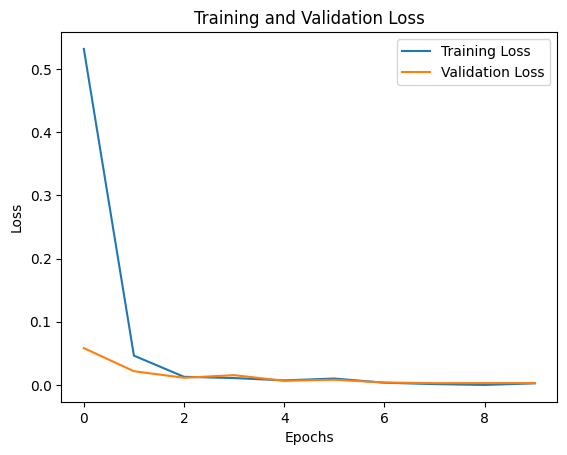

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
import numpy as np

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

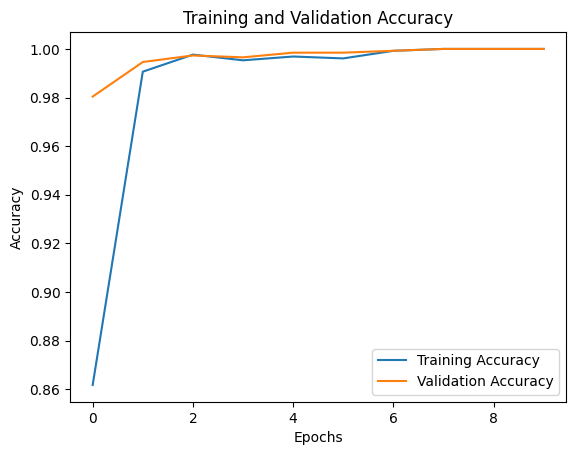

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [1]:
# !pip install mediapipe
# import framework
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import tensorflow as tf
import cv2
import mediapipe as mp
from keras.models import load_model
import numpy as np
import time
import pandas as pd
from PIL import Image

In [2]:
import mediapipe as mp


# Initialize MediaPipe Hands
mp_hands = mp.solutions.hands
hands = mp_hands.Hands()

mp_drawing = mp.solutions.drawing_utils


In [3]:
model = load_model('trained_cnn_model_4.h5')

mphands = mp.solutions.hands
hands = mphands.Hands()
mp_drawing = mp.solutions.drawing_utils

cap = cv2.VideoCapture(0)
_, frame = cap.read()

h, w, c = frame.shape

analysisframe = ''
letterpred = ['A','B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
previous = None
all_preds=[]

C:\Users\NEEL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [4]:
print(len(letterpred))

26


In [12]:
!pip install gtts
import cv2
import mediapipe as mp
from PIL import Image
from collections import Counter
from gtts import gTTS
# Initialize VideoCapture
cap = cv2.VideoCapture(0)



# h, w, c = frame.shape
pred_alpha = None
# Initialize Mediapipe hands module
mp_hands = mp.solutions.hands
hands = mp_hands.Hands()
words = []
all_preds = []
        
while (True):
    _, frame = cap.read()
    # Define the new width and height
    # frame = cv2.resize(frame, (2*frame.shape[1], 2*frame.shape[0]))
    height, width, _ = frame.shape

    # Calculate the size of the square
    min_size = min(height, width)

    # Calculate the coordinates for cropping
    start_x = (width - min_size) // 2
    start_y = (height - min_size) // 2
    end_x = start_x + min_size
    end_y = start_y + min_size

    # Crop the frame to a square
    frame = frame[start_y:end_y*3, start_x:end_x*3]
    # Resize the frame
    # frame = cv2.resize(frame, (new_width, new_height))
    array = np.zeros((400, 400, 3), dtype=np.uint8)
    k = cv2.waitKey(1)
    if k%256 == 27:
        # ESC pressed
        print("Escape hit, closing...")
        break
    landmark_drawing_spec = mp.solutions.drawing_utils.DrawingSpec(color=(0, 0,255))
    # SPACE pressed
    # SPACE pressed
    frame = cv2.flip(frame, 1)
    analysis_frame = frame
    framergba_analysis = cv2.cvtColor(analysis_frame, cv2.COLOR_BGR2RGB)
    result_analysis = hands.process(framergba_analysis)
    hand_landmarksanalysis = result_analysis.multi_hand_landmarks
    
    if hand_landmarksanalysis:
        for handLMsanalysis in hand_landmarksanalysis:
           # print(handLMsanalysis)
            x_max = 0
            y_max = 0
            x_min = w
            y_min = h
            for lmanalysis in handLMsanalysis.landmark:
                x, y = int(lmanalysis.x * w), int(lmanalysis.y * h)
                x_min = min(x_min, x)
                x_max = max(x_max, x)
                y_min = min(y_min, y)
                y_max = max(y_max, y)
            
            # Calculate the center of the bounding box
            center_x = (x_min + x_max) // 2
            center_y = (y_min + y_max) // 2
            
            # Define the fixed size of the bounding box
            half_fixed_size = 200
            
            # Calculate new bounding box coordinates
            x_min = max(0, center_x - half_fixed_size)
            x_max = min(w, center_x + half_fixed_size)
            y_min = max(0, center_y - half_fixed_size)
            y_max = min(h, center_y + half_fixed_size)
            # Calculate the width and height of the box
            # box_width = x_max - x_min
            # box_height = y_max - y_min
            
            # palm_center_x = (x_min + x_max) // 2
            # palm_center_y = (y_min + y_max) // 2
            
            # # Calculate half of the fixed size
            # half_fixed_size = 200
            
            # # Calculate the new bounding box coordinates
            # x_min = palm_center_x - half_fixed_size
            # x_max = palm_center_x + half_fixed_size
            # y_min = palm_center_y - half_fixed_size
            # y_max = palm_center_y + half_fixed_size
            
            # # Make sure the box stays within the image boundaries
            # x_min = max(0, x_min)
            # x_max = min(w, x_max)
            # y_min = max(0, y_min)
            # y_max = min(h, y_max)

            cropped_frame = frame[y_min:y_max, x_min:x_max]

            # Draw the square bounding box
            cv2.rectangle(frame, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)
        
            mp_drawing.draw_landmarks(array, handLMsanalysis, mphands.HAND_CONNECTIONS, landmark_drawing_spec=landmark_drawing_spec)
        font = cv2.FONT_HERSHEY_SIMPLEX
        font_scale = 1
        color = (255, 255, 255) 
        thickness = 2
        org = (50, 50)  # 
        cv2.putText(array, pred_alpha, org, font, font_scale, color, thickness)
        cv2.imshow("Frame", array)
        #print(array.shape)




    img = Image.fromarray(array)
    #     img.save("saved_frame12.jpg")
    #     img_1 = Image.open("saved_frame12.jpg")
        
    # # Resize the image to 200x200 while maintaining the aspect ratio
    img_resized = img.resize((224, 224))
    # Convert the resized image back to an array
    resized_img_array = np.array(img_resized)
    input_img = resized_img_array.reshape(1, 224, 224, 3)
    cv2.imwrite('saved_frame14.jpg', resized_img_array)
    input_img = input_img / 255.0  
    #random_img = images[500].reshape(1, 200, 200, 3)
    prediction = model.predict(input_img)
    # print(prediction)
    predarray = np.array(prediction[0])
    letter_prediction_dict = {letterpred[i]: predarray[i] for i in range(len(letterpred))}
    predarrayordered = sorted(predarray, reverse=True)
    high1 = predarrayordered[0]
    high2 = predarrayordered[1]
    high3 = predarrayordered[2]
    for key,value in letter_prediction_dict.items():
        if value==high1:
            #print("Predicted Character 1: ", key)
            pred_alpha = key
            #print('Confidence 1: ', 100*value)

    #print(pred_alpha)
    all_preds.append(pred_alpha)
    if len(all_preds)==20:

        counts = Counter(all_preds)
        max_count = max(counts.values())
        most_frequent_alphabets = [alphabet for alphabet, count in counts.items() if count == max_count]
        all_preds = []
        print(most_frequent_alphabets, max_count)
        words.append(most_frequent_alphabets[0])

cap.release()
cv2.destroyAllWindows()

import os

def text_to_speech(text, language='en'):
    # Create a gTTS object
    tts = gTTS(text=text, lang=language, slow=False)
    
    # Save the audio file
    tts.save("output.mp3")
    
    # Play the audio file
    os.system("start output.mp3")
    
words = words[1:]
# Example usage

word = ''.join(words)
 # Output: apple

text_to_speech(word.lower())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
['N'] 11
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1

In [42]:
print(words)

['U', 'B', 'T', 'I', 'A', 'N', 'T']


In [8]:
from collections import Counter

counts = Counter(all_preds)
max_count = max(counts.values())
most_frequent_alphabets = [alphabet for alphabet, count in counts.items() if count == max_count]

print(most_frequent_alphabets, max_count)

len(all_preds)




['A'] 15


60

In [27]:
import cv2

def image_to_array(image_path):
    # Read the image using OpenCV
    image = cv2.imread(image_path)
    
    # Resize the image to 224x224
    resized_image = cv2.resize(image, (224, 224))
    
    # Convert the image to RGB (if it's in BGR)
    rgb_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)
    
    return rgb_image

# Example image path
image_p = "skeletal images 2/U/0.jpg"


# Convert the image to a 224x224x3 array
image_a = image_to_array(image_p)

# Print the shape of the array
print("Array shape:", image_a.shape)


Array shape: (224, 224, 3)


In [28]:
# images[0] = images[6000]/255.0
model = load_model('trained_cnn_model_4.h5')

cv2.imwrite('saved_frame13.jpg', image_a)
random_img = image_a.reshape(1, 224, 224, 3)
random_img = random_img/ 255.0
prediction = model.predict(random_img)
predarray = np.array(prediction[0])
letter_prediction_dict = {letterpred[i]: predarray[i] for i in range(len(letterpred))}
predarrayordered = sorted(predarray, reverse=True)
high1 = predarrayordered[0]
high2 = predarrayordered[1]
high3 = predarrayordered[2]


for key,value in letter_prediction_dict.items():
    if value==high1:
        print("Predicted Character 1: ", key)
        print('Confidence 1: ', 100*value)
    elif value==high2:
        print("Predicted Character 2: ", key)
        print('Confidence 2: ', 100*value)
    elif value==high3:
        print("Predicted Character 3: ", key)
        
        print('Confidence 3: ', 100*value)
time.sleep(5)
print(letter_prediction_dict)
print(letterpred)

1/1 [==============================] - 0s 55ms/step


Predicted Character 2:  D
Confidence 2:  1.2566698615046334e-05
Predicted Character 3:  K
Confidence 3:  5.4360088652671834e-08
Predicted Character 1:  U
Confidence 1:  99.99998807907104
{'A': 3.058586e-14, 'B': 2.099993e-11, 'C': 6.303099e-15, 'D': 1.2566699e-07, 'E': 2.7811414e-15, 'F': 2.0648364e-17, 'G': 2.1443061e-10, 'H': 3.6821995e-12, 'I': 1.3485244e-12, 'J': 1.1223535e-17, 'K': 5.436009e-10, 'L': 1.3777257e-16, 'M': 2.374252e-20, 'N': 2.0279667e-10, 'O': 4.9845404e-17, 'P': 2.776252e-17, 'Q': 7.8428005e-17, 'R': 5.3599833e-11, 'S': 6.5810534e-12, 'T': 1.3724279e-12, 'U': 0.9999999, 'V': 2.860673e-13, 'W': 2.3330346e-11, 'X': 5.3552925e-15, 'Y': 5.1132223e-12, 'Z': 1.9079373e-15}
['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [ ]:
train_generator[0][0]